In [10]:
# titanic_data_analysis.py

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load Dataset
file_path = "titanic.csv"   # your Titanic dataset
df = pd.read_csv(file_path)

print("✅ Titanic Dataset Loaded!\n")


✅ Titanic Dataset Loaded!



In [11]:

# 2. Basic Info
print("📊 Dataset Info:")
print(df.info(), "\n")

print("🔍 First 5 Rows:")
print(df.head(), "\n")

print("📐 Shape of Dataset:", df.shape, "\n")


📊 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None 

🔍 First 5 Rows:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0 

In [12]:

# 3. Check Missing Values
print("❌ Missing Values:\n", df.isnull().sum(), "\n")

# Fill missing Age with median
df['Age'] = df['Age'].fillna(df['Age'].median())

# Fill missing Embarked with mode
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# Drop Cabin (too many missing values)
df = df.drop(columns=['Cabin'])


❌ Missing Values:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64 



In [13]:

# 4. Summary Statistics
print("📊 Descriptive Statistics:")
print(df.describe(include='all'), "\n")


📊 Descriptive Statistics:
        PassengerId    Survived      Pclass                 Name   Sex  \
count    891.000000  891.000000  891.000000                  891   891   
unique          NaN         NaN         NaN                  891     2   
top             NaN         NaN         NaN  Dooley, Mr. Patrick  male   
freq            NaN         NaN         NaN                    1   577   
mean     446.000000    0.383838    2.308642                  NaN   NaN   
std      257.353842    0.486592    0.836071                  NaN   NaN   
min        1.000000    0.000000    1.000000                  NaN   NaN   
25%      223.500000    0.000000    2.000000                  NaN   NaN   
50%      446.000000    0.000000    3.000000                  NaN   NaN   
75%      668.500000    1.000000    3.000000                  NaN   NaN   
max      891.000000    1.000000    3.000000                  NaN   NaN   

               Age       SibSp       Parch  Ticket        Fare Embarked  
count   891

In [14]:

# 5. Survival Rate
survival_rate = df['Survived'].mean() * 100
print(f"🚢 Overall Survival Rate: {survival_rate:.2f}%\n")


🚢 Overall Survival Rate: 38.38%



In [15]:

# 6. Survival by Gender
print("🧑‍🤝‍🧑 Survival by Gender:")
print(df.groupby('Sex')['Survived'].mean() * 100, "\n")


🧑‍🤝‍🧑 Survival by Gender:
Sex
female    74.203822
male      18.890815
Name: Survived, dtype: float64 



In [16]:

# 7. Survival by Passenger Class
print("🏷️ Survival by Pclass:")
print(df.groupby('Pclass')['Survived'].mean() * 100, "\n")


🏷️ Survival by Pclass:
Pclass
1    62.962963
2    47.282609
3    24.236253
Name: Survived, dtype: float64 



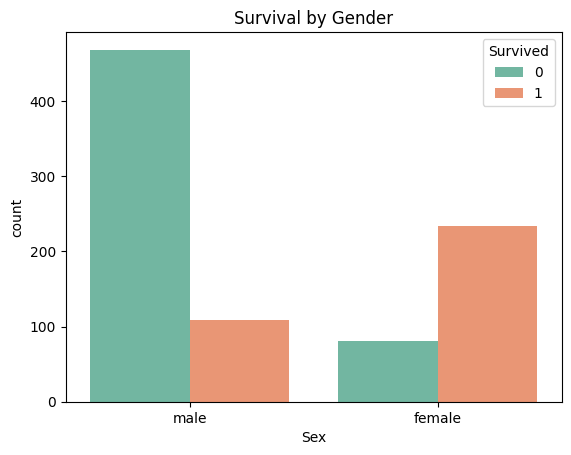

In [17]:

# 8. Visualization

# Gender vs Survival
sns.countplot(x='Sex', hue='Survived', data=df, palette='Set2')
plt.title("Survival by Gender")
plt.show()


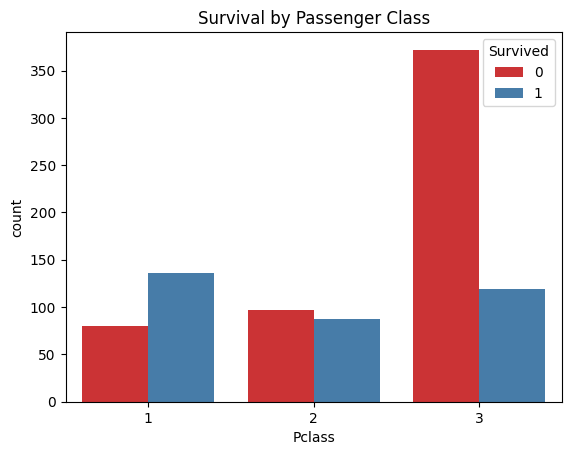

In [18]:

# Pclass vs Survival
sns.countplot(x='Pclass', hue='Survived', data=df, palette='Set1')
plt.title("Survival by Passenger Class")
plt.show()


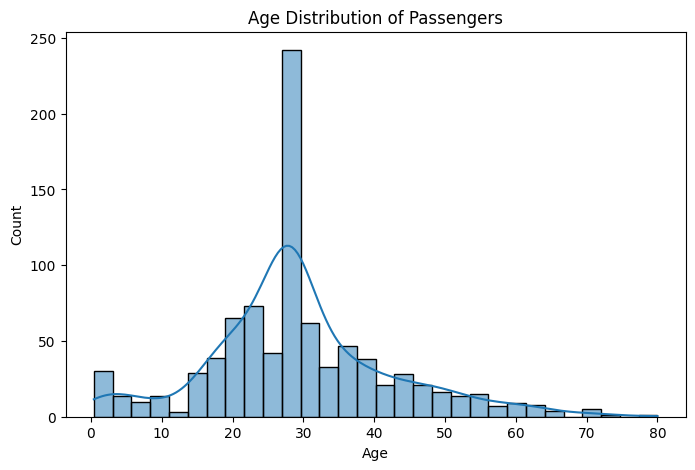

In [19]:

# Age Distribution
plt.figure(figsize=(8,5))
sns.histplot(df['Age'], bins=30, kde=True)
plt.title("Age Distribution of Passengers")
plt.show()


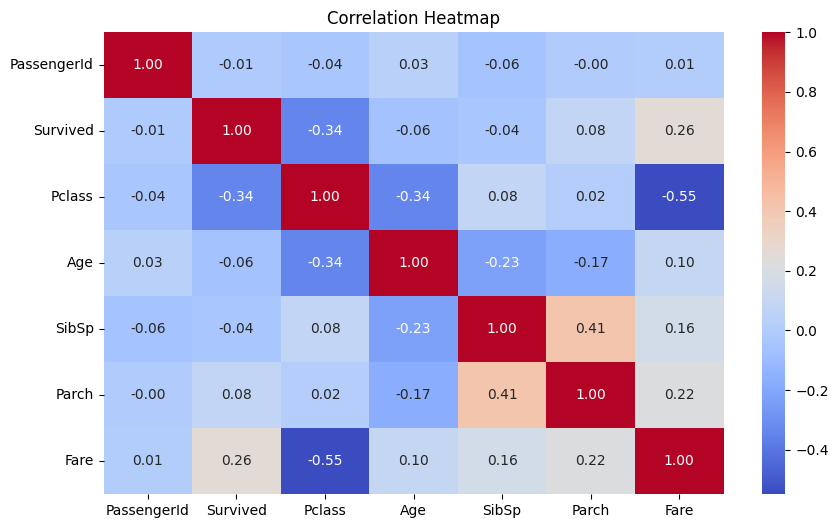

In [22]:
# Correlation Heatmap (numeric columns only)
plt.figure(figsize=(10,6))
numeric_df = df.select_dtypes(include=['int64', 'float64'])
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()
